In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import optuna
from optuna import Trial
from fbprophet import Prophet
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(
    "../input/2s/15day_0201_0215.csv", usecols=["ds", "y"], parse_dates=["ds"]
)
print(df.shape)
df.head()

(648000, 2)


,ds,y
0,2021-02-01 19:00:00,12.0
1,2021-02-01 19:00:02,7.0
2,2021-02-01 19:00:04,1.0
3,2021-02-01 19:00:06,16.0
4,2021-02-01 19:00:08,19.0


In [3]:
train = df[df['ds'] < '2021-2-10']
valid = df[df['ds'] >= '2021-2-10']
valid["days"] = valid["ds"].apply(lambda x: x.day)
valid["hour"] = valid["ds"].apply(lambda x: x.hour)
valid["days_hour"] = valid["days"].astype(str) + "_" + valid["hour"].astype(str)
valid = valid.groupby("days_hour")["y"].agg("mean").reset_index()

In [13]:
cap = np.max(train.y)
floor = np.min(train.y)

In [18]:
prophet_params = {"changepoint_range": 0.8, "n_changepoints": 20, "changepoint_prior_scale":0.001, "seasonality_prior_scale": 1}
prophet_params["growth"] = "logistic"
prophet_params["seasonality_mode"] = "additive"
prophet_params["weekly_seasonality"] = True
prophet_params["daily_seasonality"] = True
prophet_params["yearly_seasonality"] = False
m = Prophet(**prophet_params)

In [19]:
train['cap'] = cap
train['floor'] = floor

m.fit(train)

future = m.make_future_dataframe(periods=144, freq="H")
future['cap'] = cap
future['floor'] = floor

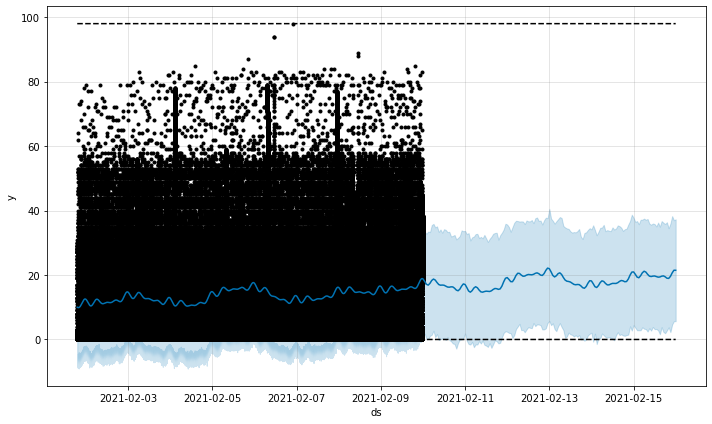

In [20]:
forecast = m.predict(future)
forecast_plot = m.plot(forecast)

In [21]:
valid_forecast = forecast.tail(144)
val_rmse = mean_squared_error(valid.tail(144).y, valid_forecast.yhat, squared=False)
print(val_rmse)

6.271705925395849


In [8]:
cap = np.max(df.y)
floor = np.min(df.y)

In [9]:
df['cap'] = cap
df['floor'] = floor

m = Prophet(**prophet_params)
m.fit(df)

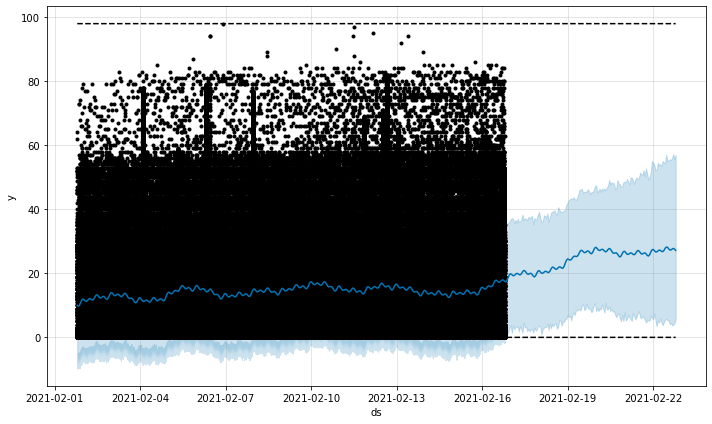

In [10]:
future = m.make_future_dataframe(periods=144, freq="H")
future['cap'] = cap
future['floor'] = floor
forecast1 = m.predict(future)
fig1 = m.plot(forecast1)